___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project). You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
from sklearn.model_selection import cross_validate

In [7]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [8]:
from sklearn.linear_model import Lasso, LassoCV

In [9]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [10]:
from sklearn.model_selection import GridSearchCV   

In [11]:
df = pd.read_csv("final_scout_dummy.csv")
df.head()

,price,km,prev_owner,number_of_doors,number_of_seats,displacement_cc,Cylinders,co2_emission,Gears,age,hp_kw,Consumption_comb,Weight_kg,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,...,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,paint_type_Perl effect,paint_type_Uni/basic,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_front,drive_chain_rear,Fuel_Diesel,Fuel_Hybride,Fuel_LPG/CNG,Type__Employee's car,Type__New,Type__Pre-registered,Type__Used,upholstery_type_Full leather,upholstery_type_Part leather,upholstery_type_Velour,upholstery_type_alcantara,upholstery_color_Black,upholstery_color_Blue,upholstery_color_Brown,upholstery_color_Grey,upholstery_color_Orange,upholstery_color_Other,upholstery_color_Red,upholstery_color_White,upholstery_color_Yellow,insp_new_Yes
0,15770.000,56013.000,2.000,5.000,5.000,1400.000,3.000,99.000,5.000,3.000,66.000,3.800,1220.000,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,14500.000,80000.000,1.000,3.000,4.000,1800.000,4.000,129.000,7.000,2.000,141.000,5.600,1255.000,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,1,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,14640.000,83450.000,1.000,4.000,4.000,1600.000,4.000,99.000,5.000,3.000,85.000,3.800,1135.000,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,14500.000,73000.000,1.000,3.000,4.000,1400.000,3.000,99.000,6.000,3.000,66.000,3.800,1195.000,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,1,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,16790.000,16200.000,1.000,5.000,5.000,1400.000,3.000,109.000,5.000,3.000,66.000,4.100,1135.000,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,0,1,1,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Columns: 149 entries, price to insp_new_Yes
dtypes: float64(13), int64(136)
memory usage: 18.1 MB


In [13]:
df.shape

(15915, 149)

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [14]:
X = df.drop("price", axis =1)
y = df["price"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [16]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (12732, 148)
Train target shape   :  (12732,)
Test features shape  :  (3183, 148)
Test target shape    :  (3183,)


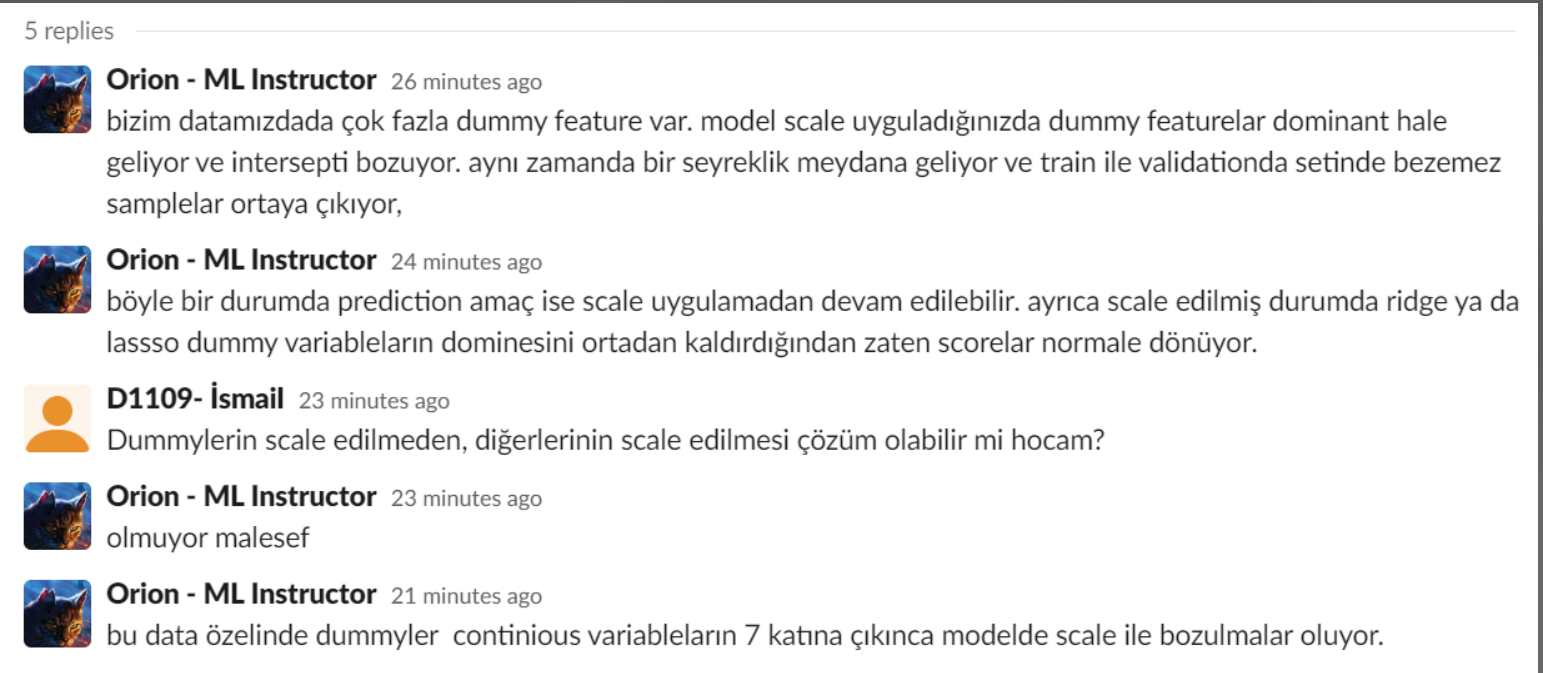

##### normal linear regresyon bununla baş edemiyor

## Scaling the Data

scaler = MinMaxScaler()
scaler

scaler.fit(X_train) 

X_train_scaled = scaler.transform(X_train)   # burada scale etmiş oluyoruz
X_train_scaled

X_test_scaled = scaler.transform(X_test)
X_test_scaled 

pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()
#Applying aggregation across all the columns, mean and std will be found for each column in the dataframe

pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [17]:
linear_model = LinearRegression()

In [18]:
linear_model.fit(X_train, y_train) 

LinearRegression()

In [19]:
linear_model.intercept_

17685.404875938842

In [20]:
y_pred = linear_model.predict(X_test)
y_train_pred = linear_model.predict(X_train)     ## bunu yapmamızın nedeni overfitting-underfitting var mı bakacağız.

In [21]:
def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [22]:
linear_score =train_val(y_train, y_train_pred, y_test, y_pred, "linear") # Evaluate the result. Overfitting?
linear_score

,linear_train,linear_test
R2,0.895,0.892
mae,1664.505,1703.002
mse,5737721.601,5864407.326
rmse,2395.354,2421.654


In [23]:
def color_red(val):
    if abs(val) > 0.90 and abs(val) < 0.99:
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'

In [24]:
pd.DataFrame(X_train).corr().style.applymap(color_red)

## <span style='color:red'> Cross Validation</span> 

In [25]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', 
                                                            'neg_root_mean_squared_error'], cv = 10)

In [26]:
scores

{'fit_time': array([0.20706582, 0.1867733 , 0.17454147, 0.17062807, 0.1793344 ,
        0.20753765, 0.17378092, 0.19090486, 0.21768379, 0.2295382 ]),
 'score_time': array([0.00710797, 0.00863504, 0.01680493, 0.01601171, 0.01031327,
        0.01650119, 0.01649928, 0.00920606, 0.01070976, 0.01318669]),
 'test_r2': array([0.89936305, 0.88105717, 0.89385193, 0.88494527, 0.8879291 ,
        0.89542811, 0.89560445, 0.89873526, 0.87426159, 0.89606349]),
 'test_neg_mean_absolute_error': array([-1600.59394819, -1770.88711544, -1680.49610082, -1655.32345407,
        -1744.56527913, -1711.1562868 , -1646.10073318, -1677.56393315,
        -1749.42469015, -1670.67530233]),
 'test_neg_mean_squared_error': array([-4898123.64601655, -6476802.85524821, -5780429.76158541,
        -6117062.52956452, -6616915.74456231, -6268741.58023237,
        -4990434.75677906, -5861931.51825231, -7092162.09383116,
        -5578719.56697499]),
 'test_neg_root_mean_squared_error': array([-2213.17049637, -2544.95635626, 

In [27]:
pd.DataFrame(scores, index = range(1,11))  

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.207,0.007,0.899,-1600.594,-4898123.646,-2213.170
2,0.187,0.009,0.881,-1770.887,-6476802.855,-2544.956
3,0.175,0.017,0.894,-1680.496,-5780429.762,-2404.252
4,0.171,0.016,0.885,-1655.323,-6117062.530,-2473.270
5,0.179,0.010,0.888,-1744.565,-6616915.745,-2572.337
6,0.208,0.017,0.895,-1711.156,-6268741.580,-2503.746
7,0.174,0.016,0.896,-1646.101,-4990434.757,-2233.928
8,0.191,0.009,0.899,-1677.564,-5861931.518,-2421.143
9,0.218,0.011,0.874,-1749.425,-7092162.094,-2663.111
10,0.230,0.013,0.896,-1670.675,-5578719.567,-2361.931


In [28]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()    

test_r2                                   0.891
test_neg_mean_absolute_error          -1690.679
test_neg_mean_squared_error        -5968132.405
test_neg_root_mean_squared_error      -2439.184
dtype: float64

In [29]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.895,0.892
mae,1664.505,1703.002
mse,5737721.601,5864407.326
rmse,2395.354,2421.654


In [30]:
coeff_line = pd.DataFrame(data = linear_model.coef_ ,index=X.columns,columns = ["Coefficient"])
coeff_line                                                                                  #scale yapmadığımıza dikkat

,Coefficient
km,-0.038
prev_owner,8.550
number_of_doors,386.792
number_of_seats,-14.410
displacement_cc,-1.671
...,...
upholstery_color_Other,674.386
upholstery_color_Red,780.598
upholstery_color_White,2001.566
upholstery_color_Yellow,475.586


## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

## Scaling the Data

In [31]:
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [32]:
scaler.fit(X_train) 

MinMaxScaler()

In [33]:
X_train_scaled = scaler.transform(X_train)   # burada scale etmiş oluyoruz
X_train_scaled

array([[0.15772871, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.29968454, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02839117, 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.05362776, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02018927, 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.08226183, 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ]])

In [34]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled 

array([[5.34700315e-02, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.15457413e-05, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [6.74416404e-02, 3.33333333e-01, 6.66666667e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.99684543e-02, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.15457413e-05, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.37539432e-01, 0.00000000e+00, 6.66666667e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [35]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()
#Applying aggregation across all the columns, mean and std will be found for each column in the dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147
mean,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
std,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [36]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147
mean,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
std,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [37]:
ridge_model = Ridge(random_state=101) 

In [38]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(random_state=101)

In [39]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [40]:
rid_alp1 = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rid_alp1

,ridge_train,ridge_test
R2,0.895,0.892
mae,1663.590,1701.594
mse,5742749.072,5869764.196
rmse,2396.403,2422.760


In [41]:
pd.concat([linear_score, rid_alp1], axis=1) 

,linear_train,linear_test,ridge_train,ridge_test
R2,0.895,0.892,0.895,0.892
mae,1664.505,1703.002,1663.590,1701.594
mse,5737721.601,5864407.326,5742749.072,5869764.196
rmse,2395.354,2421.654,2396.403,2422.760


## For Ridge Regression CV with alpha : 1 

In [42]:
model = Ridge(alpha=1, random_state=101)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [43]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.061,0.008,0.899,-1600.164,-4898206.983,-2213.189
2,0.076,0.000,0.881,-1769.239,-6473690.987,-2544.345
3,0.078,0.000,0.894,-1677.130,-5785405.849,-2405.287
4,0.063,0.016,0.886,-1654.217,-6067285.342,-2463.186
5,0.078,0.000,0.888,-1741.968,-6621729.302,-2573.272
6,0.078,0.000,0.895,-1709.160,-6270446.068,-2504.086
7,0.062,0.000,0.896,-1641.932,-4979450.737,-2231.468
8,0.073,0.000,0.898,-1677.622,-5878339.243,-2424.529
9,0.064,0.016,0.874,-1744.532,-7108319.384,-2666.143
10,0.062,0.016,0.896,-1669.556,-5564471.845,-2358.913


In [44]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                   0.891
test_neg_mean_absolute_error          -1688.552
test_neg_mean_squared_error        -5964734.574
test_neg_root_mean_squared_error      -2438.442
dtype: float64

In [45]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,0.895,0.892
mae,1663.590,1701.594
mse,5742749.072,5869764.196
rmse,2396.403,2422.760


In [46]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"],index=X.columns)
rm_df

,ridge_coef_1
km,-11721.488
prev_owner,15.579
number_of_doors,1154.193
number_of_seats,-72.443
displacement_cc,-2862.487
...,...
upholstery_color_Other,546.179
upholstery_color_Red,562.690
upholstery_color_White,1581.103
upholstery_color_Yellow,271.020


In [47]:
pd.concat([coeff_line,rm_df], axis = 1)       # line'da scale edilmediğini unutmayalım.

,Coefficient,ridge_coef_1
km,-0.038,-11721.488
prev_owner,8.550,15.579
number_of_doors,386.792,1154.193
number_of_seats,-14.410,-72.443
displacement_cc,-1.671,-2862.487
...,...,...
upholstery_color_Other,674.386,546.179
upholstery_color_Red,780.598,562.690
upholstery_color_White,2001.566,1581.103
upholstery_color_Yellow,475.586,271.020


## best alphayı seçerek overfitting'ten kurtarmanın yanında hatamızı da minimize etmiş oluruz.

In [48]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [49]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 10, scoring= "neg_root_mean_squared_error")  
                                                        # ridgecv'de bir tane score yazabiliyoruz dikkat 

In [50]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [51]:
ridge_cv_model.alpha_

0.72

In [52]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [53]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")        # şuan alpha 0.02
rcs

,ridge_cv_train,ridge_cv_test
R2,0.895,0.892
mae,1663.781,1701.844
mse,5740652.716,5867451.037
rmse,2395.966,2422.282


In [54]:
pd.concat([linear_score, rid_alp1, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.895,0.892,0.895,0.892,0.895,0.892
mae,1664.505,1703.002,1663.590,1701.594,1663.781,1701.844
mse,5737721.601,5864407.326,5742749.072,5869764.196,5740652.716,5867451.037
rmse,2395.354,2421.654,2396.403,2422.760,2395.966,2422.282


## alternatif alpha bulma yellowbrick

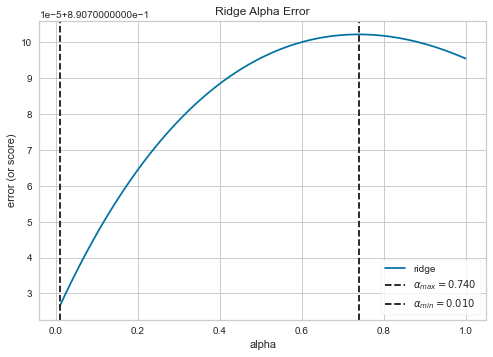

In [55]:
from yellowbrick.regressor import ManualAlphaSelection

# Create a list of alphas to cross-validate against
alpha_space2 = np.linspace(0.1, 20, 100)


# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alpha_space,                                             # ridgecv yazmıyoruz buraya.
    cv=10,

)

visualizer.fit(X_train_scaled, y_train)
visualizer.show();

## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [56]:
lasso_model = Lasso(alpha=1, random_state=101)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=101)

In [57]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [58]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.894,0.891
mae,1666.940,1704.267
mse,5767201.247,5890523.932
rmse,2401.500,2427.040


In [59]:
pd.concat([linear_score, rid_alp1, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.895,0.892,0.895,0.892,0.895,0.892,0.894,0.891
mae,1664.505,1703.002,1663.590,1701.594,1663.781,1701.844,1666.940,1704.267
mse,5737721.601,5864407.326,5742749.072,5869764.196,5740652.716,5867451.037,5767201.247,5890523.932
rmse,2395.354,2421.654,2396.403,2422.760,2395.966,2422.282,2401.500,2427.040


## For Lasso CV with Default Alpha : 1

In [60]:
model = Lasso(alpha=1, random_state=101)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [61]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.372,0.000,0.899,-1602.430,-4920037.391,-2218.116
2,0.390,0.000,0.881,-1771.576,-6492971.566,-2548.131
3,0.392,0.000,0.894,-1676.410,-5767640.101,-2401.591
4,0.390,0.008,0.887,-1655.241,-6000012.558,-2449.492
5,0.385,0.008,0.889,-1736.791,-6571078.142,-2563.411
6,0.367,0.008,0.896,-1704.871,-6244789.217,-2498.958
7,0.378,0.005,0.896,-1642.557,-4985380.199,-2232.796
8,0.391,0.000,0.898,-1680.668,-5908888.942,-2430.821
9,0.393,0.000,0.875,-1738.859,-7059511.989,-2656.974
10,0.451,0.000,0.897,-1669.598,-5538482.069,-2353.398


In [62]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                   0.891
test_neg_mean_absolute_error          -1687.900
test_neg_mean_squared_error        -5948879.217
test_neg_root_mean_squared_error      -2435.369
dtype: float64

In [63]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.894,0.891
mae,1666.940,1704.267
mse,5767201.247,5890523.932
rmse,2401.500,2427.040


In [64]:
lasso_model.coef_

array([-1.17259556e+04, -0.00000000e+00,  1.12953904e+03,  0.00000000e+00,
       -2.56207930e+03,  9.87841483e+02, -2.44867727e+03,  9.44299322e+02,
       -4.58044620e+03,  2.22284562e+04,  2.34175794e+03, -1.52525457e+03,
       -8.82064888e+00,  2.00414900e+02, -3.75953874e+00,  1.48353061e+02,
       -3.62312569e+02, -2.57511631e+02, -4.63826899e+01, -2.19886325e+02,
       -1.40375297e+02, -3.09088758e+01, -2.13836125e+02,  1.63247945e+02,
       -8.51704204e+02, -1.71547004e+02, -3.95306169e+00, -2.64904651e+02,
       -3.55431350e+02, -2.19004768e+02,  8.18808080e+02,  6.77647353e+02,
        0.00000000e+00,  4.23531165e+02, -5.44710054e+02, -7.14307006e+02,
        2.19254889e+02,  4.58798565e+00,  1.45923066e+02,  0.00000000e+00,
       -3.30563346e+02,  3.46832518e+02, -0.00000000e+00, -5.44823900e+01,
        3.15148577e+02, -1.92720851e+02,  2.07713730e+02,  0.00000000e+00,
        7.21321346e+01,  1.62789749e+02,  9.89593824e+01,  5.59507464e+02,
        2.23630488e+03,  

In [65]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"],index=X.columns)
lsm_df

,lasso_coef_1
km,-11725.956
prev_owner,-0.000
number_of_doors,1129.539
number_of_seats,0.000
displacement_cc,-2562.079
...,...
upholstery_color_Other,-0.000
upholstery_color_Red,0.000
upholstery_color_White,0.000
upholstery_color_Yellow,-0.000


In [66]:
pd.concat([coeff_line, rm_df, lsm_df], axis = 1)

,Coefficient,ridge_coef_1,lasso_coef_1
km,-0.038,-11721.488,-11725.956
prev_owner,8.550,15.579,-0.000
number_of_doors,386.792,1154.193,1129.539
number_of_seats,-14.410,-72.443,0.000
displacement_cc,-1.671,-2862.487,-2562.079
...,...,...,...
upholstery_color_Other,674.386,546.179,-0.000
upholstery_color_Red,780.598,562.690,0.000
upholstery_color_White,2001.566,1581.103,0.000
upholstery_color_Yellow,475.586,271.020,-0.000


## best alphayı seçerek overfitting'ten kurtarmanın yanında hatamızı da minimize etmiş oluruz.lasso için

In [67]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=101) 

In [68]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=101)

In [69]:
lasso_cv_model.alpha_ 

1.0

## best alpha uç değer geldiğinden bu uzayımızı değiştirmeliyiz .

In [71]:
alpha_space = np.linspace(1, 2, 100)
alpha_space

array([1.        , 1.01010101, 1.02020202, 1.03030303, 1.04040404,
       1.05050505, 1.06060606, 1.07070707, 1.08080808, 1.09090909,
       1.1010101 , 1.11111111, 1.12121212, 1.13131313, 1.14141414,
       1.15151515, 1.16161616, 1.17171717, 1.18181818, 1.19191919,
       1.2020202 , 1.21212121, 1.22222222, 1.23232323, 1.24242424,
       1.25252525, 1.26262626, 1.27272727, 1.28282828, 1.29292929,
       1.3030303 , 1.31313131, 1.32323232, 1.33333333, 1.34343434,
       1.35353535, 1.36363636, 1.37373737, 1.38383838, 1.39393939,
       1.4040404 , 1.41414141, 1.42424242, 1.43434343, 1.44444444,
       1.45454545, 1.46464646, 1.47474747, 1.48484848, 1.49494949,
       1.50505051, 1.51515152, 1.52525253, 1.53535354, 1.54545455,
       1.55555556, 1.56565657, 1.57575758, 1.58585859, 1.5959596 ,
       1.60606061, 1.61616162, 1.62626263, 1.63636364, 1.64646465,
       1.65656566, 1.66666667, 1.67676768, 1.68686869, 1.6969697 ,
       1.70707071, 1.71717172, 1.72727273, 1.73737374, 1.74747

In [72]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=101) 

In [73]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([1.        , 1.01010101, 1.02020202, 1.03030303, 1.04040404,
       1.05050505, 1.06060606, 1.07070707, 1.08080808, 1.09090909,
       1.1010101 , 1.11111111, 1.12121212, 1.13131313, 1.14141414,
       1.15151515, 1.16161616, 1.17171717, 1.18181818, 1.19191919,
       1.2020202 , 1.21212121, 1.22222222, 1.23232323, 1.24242424,
       1.25252525, 1.26262626, 1.27272727, 1.28282828, 1.29292929,
       1.303030...
       1.70707071, 1.71717172, 1.72727273, 1.73737374, 1.74747475,
       1.75757576, 1.76767677, 1.77777778, 1.78787879, 1.7979798 ,
       1.80808081, 1.81818182, 1.82828283, 1.83838384, 1.84848485,
       1.85858586, 1.86868687, 1.87878788, 1.88888889, 1.8989899 ,
       1.90909091, 1.91919192, 1.92929293, 1.93939394, 1.94949495,
       1.95959596, 1.96969697, 1.97979798, 1.98989899, 2.        ]),
        cv=5, max_iter=100000, random_state=101)

In [74]:
lasso_cv_model.alpha_ 

1.1111111111111112

In [75]:
y_pred = lasso_cv_model.predict(X_test_scaled)  
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [76]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.894,0.891
mae,1667.332,1704.648
mse,5771966.976,5895432.574
rmse,2402.492,2428.051


In [77]:
pd.concat([linear_score,rid_alp1, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.895,0.892,0.895,0.892,0.895,0.892,0.894,0.891,0.894,0.891
mae,1664.505,1703.002,1663.590,1701.594,1663.781,1701.844,1666.940,1704.267,1667.332,1704.648
mse,5737721.601,5864407.326,5742749.072,5869764.196,5740652.716,5867451.037,5767201.247,5890523.932,5771966.976,5895432.574
rmse,2395.354,2421.654,2396.403,2422.760,2395.966,2422.282,2401.500,2427.040,2402.492,2428.051


## best alphalı ridge daha iyi şimdiye kadar.

## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [78]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42) # l1_ratio: 1: Lasso or 0:Ridge    
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=42)

### bu değerler default şimdilik . en uygun fi'yi bulmak burada önemli

In [79]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [80]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.620,0.611
mae,3288.138,3286.283
mse,20755133.418,21044201.894
rmse,4555.780,4587.396


In [81]:
pd.concat([linear_score,rid_alp1, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.895,0.892,0.895,0.892,0.895,0.892,0.894,0.891,0.894,0.891,0.620,0.611
mae,1664.505,1703.002,1663.590,1701.594,1663.781,1701.844,1666.940,1704.267,1667.332,1704.648,3288.138,3286.283
mse,5737721.601,5864407.326,5742749.072,5869764.196,5740652.716,5867451.037,5767201.247,5890523.932,5771966.976,5895432.574,20755133.418,21044201.894
rmse,2395.354,2421.654,2396.403,2422.760,2395.966,2422.282,2401.500,2427.040,2402.492,2428.051,4555.780,4587.396


### Choosing best ALPHA and l1_ratio values with Cross-Validation

In [82]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [83]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 5, 
                                max_iter = 100000,random_state=42)

In [84]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [85]:
elastic_cv_model.alpha_  

1.0

## ### DİKKAT ALPHAYA GÖRE BEN RİDGE LASSO DİYEMEM l1_ratio'ya bakarak bunu yorumlayabilrim.

In [86]:
elastic_cv_model.l1_ratio_

1.0

## ilginç bir sonuç : l1_ratio = 1 -------> lasso kullansak yeter ridge tamamen devre dışı.

In [87]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [88]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.894,0.891
mae,1666.940,1704.267
mse,5767201.247,5890523.932
rmse,2401.500,2427.040


In [89]:
pd.concat([linear_score,rid_alp1, rcs, lss, lcs, es,ecs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
R2,0.895,0.892,0.895,0.892,0.895,0.892,0.894,0.891,0.894,0.891,0.620,0.611,0.894,0.891
mae,1664.505,1703.002,1663.590,1701.594,1663.781,1701.844,1666.940,1704.267,1667.332,1704.648,3288.138,3286.283,1666.940,1704.267
mse,5737721.601,5864407.326,5742749.072,5869764.196,5740652.716,5867451.037,5767201.247,5890523.932,5771966.976,5895432.574,20755133.418,21044201.894,5767201.247,5890523.932
rmse,2395.354,2421.654,2396.403,2422.760,2395.966,2422.282,2401.500,2427.040,2402.492,2428.051,4555.780,4587.396,2401.500,2427.040


## <span style='color:red'> Grid Search</span>:  bunu bütün yöntemlerde uygulayabilriiz hyperparametre bulucu.

In [90]:
elastic_model = ElasticNet(max_iter=10000, random_state=42)

In [91]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [93]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =1)

In [94]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [95]:
grid_model.best_params_   

{'alpha': 1, 'l1_ratio': 1}

In [96]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

## 7. Visually Compare Models Performance In a Graph

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))                 # yellowbrick'İn figsize'ı bununla ayarlanııyor.
viz.fit(X_train, y_train)
viz.show()